In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mglearn
from sklearn.decomposition import PCA
%matplotlib inline


In [30]:
class kmer_featurization:

  def __init__(self, k):
    """
    seqs: a list of DNA sequences
    k: the "k" in k-mer
    """
    self.k = k
    self.letters = ['A', 'T', 'C', 'G']
    self.multiplyBy = 4 ** np.arange(k-1, -1, -1) # the multiplying number for each digit position in the k-number system
    self.n = 4**k # number of possible k-mers

  def obtain_kmer_feature_for_a_list_of_sequences(self, seqs, write_number_of_occurrences=False):
    """
    Given a list of m DNA sequences, return a 2-d array with shape (m, 4**k) for the 1-hot representation of the kmer features.

    Args:
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.    
    """
    kmer_features = []
    for seq in seqs:
      this_kmer_feature = self.obtain_kmer_feature_for_one_sequence(seq.upper(), write_number_of_occurrences=write_number_of_occurrences)
      kmer_features.append(this_kmer_feature)

    kmer_features = np.array(kmer_features)

    return kmer_features

  def obtain_kmer_feature_for_one_sequence(self, seq, write_number_of_occurrences=False):
    """
    Given a DNA sequence, return the 1-hot representation of its kmer feature.

    Args:
      seq: 
        a string, a DNA sequence
      write_number_of_occurrences:
        a boolean. If False, then in the 1-hot representation, the percentage of the occurrence of a kmer will be recorded; otherwise the number of occurrences will be recorded. Default False.
    """
    number_of_kmers = len(seq) - self.k + 1

    kmer_feature = np.zeros(self.n)

    for i in range(number_of_kmers):
      this_kmer = seq[i:(i+self.k)]
      this_numbering = self.kmer_numbering_for_one_kmer(this_kmer)
      kmer_feature[this_numbering] += 1

    if not write_number_of_occurrences:
      kmer_feature = kmer_feature / number_of_kmers

    return kmer_feature

  def kmer_numbering_for_one_kmer(self, kmer):
    """
    Given a k-mer, return its numbering (the 0-based position in 1-hot representation)
    """
    digits = []
    for letter in kmer:
      digits.append(self.letters.index(letter))

    digits = np.array(digits)

    numbering = (digits * self.multiplyBy).sum()

    return numbering


In [31]:
nucleotides = np.loadtxt('../R_outputs/promoters.csv', dtype=str)

In [32]:
alphabet_file = "./alphabet"
sparse_file = "./sparse"
alphabet = np.loadtxt(alphabet_file, dtype=str)
_sparse = np.loadtxt(sparse_file, dtype=float)
sparse = {}

for i, letter_1 in enumerate(alphabet):

    sparse[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):

        sparse[letter_1][letter_2] = _sparse[i, j]

In [33]:
# Change this to nucleotide sequences

def encode(nucleotides, encoding_scheme, alphabet):

    encoded_nucleotides = []

    for nucleotide in nucleotides:

        encoded_nucleotide = []

        for nucleotide_letter in nucleotide:

            for alphabet_letter in alphabet:
                
                encoded_nucleotide.append(encoding_scheme[nucleotide_letter][alphabet_letter])

        for i in range(1, 11):
            k = i  
            obj = kmer_featurization(k) 
            kmer_feature = obj.obtain_kmer_feature_for_one_sequence(nucleotide, write_number_of_occurrences=True)
            encoded_nucleotide = list(kmer_feature) + encoded_nucleotide
        
        encoded_nucleotides.append(encoded_nucleotide)

    return np.array(encoded_nucleotides)

In [34]:
from itertools import repeat
label=[]
label.extend(repeat(0,77))
label.append(1)
label.append(2)
label.append(3)
label.append(4)

In [35]:
random1 = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
random2 = "GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG"
random3 = "CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC"
random4 = "TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT"
nucleotides = np.append(nucleotides, random1)
nucleotides = np.append(nucleotides, random2)
nucleotides = np.append(nucleotides, random3)
nucleotides = np.append(nucleotides, random4)

In [36]:
X = encode(nucleotides, sparse, alphabet)

In [46]:
# PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

Text(0, 0.5, 'Second principal component')

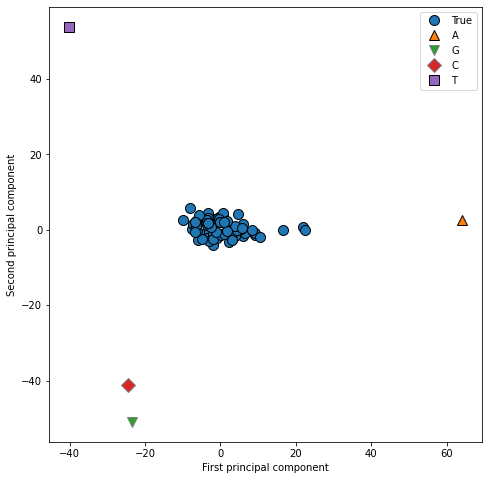

In [47]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], label)
plt.legend(["True", "A", "G", "C", "T"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Second principal component')

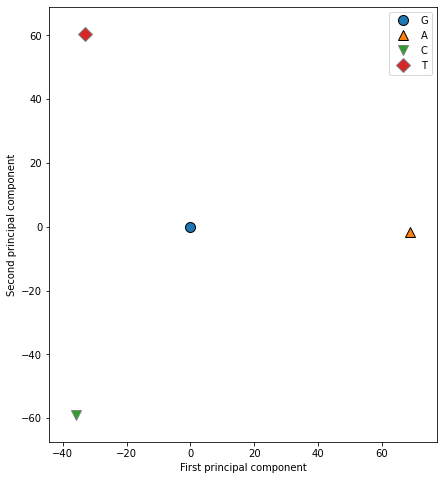

In [27]:
test = []
random1 = "GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG"
random2 = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA"
random3 = "CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC"
random4 = "TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT"
test = np.append(test, random1)
test = np.append(test, random2)
test = np.append(test, random3)
test = np.append(test, random4)
X = encode(test, sparse, alphabet)
label=[]
label.append(1)
label.append(2)
label.append(3)
label.append(4)
# PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], label)
plt.legend(["G", "A", "C", "T"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")